In [13]:
import pandas as pd
import numpy as np
crop = pd.read_csv("crop_recommendation.csv")

crops = [
    'rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
    'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
    'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
    'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'
]

crop_dict = {crop: index + 1 for index, crop in enumerate(crops)}
print(crop_dict)

{'rice': 1, 'maize': 2, 'chickpea': 3, 'kidneybeans': 4, 'pigeonpeas': 5, 'mothbeans': 6, 'mungbean': 7, 'blackgram': 8, 'lentil': 9, 'pomegranate': 10, 'banana': 11, 'mango': 12, 'grapes': 13, 'watermelon': 14, 'muskmelon': 15, 'apple': 16, 'orange': 17, 'papaya': 18, 'coconut': 19, 'cotton': 20, 'jute': 21, 'coffee': 22}


In [14]:

crop['label']=crop['label'].map(crop_dict)
x=crop.drop('label',axis = 1)
y=crop['label']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test=sc.transform(x_test)



In [15]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier  
from sklearn.metrics import accuracy_score 
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB



# Encode labels if they are not already in the correct format
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)



models = {
    # 'SVC': SVC(probability=True),
    # 'KNeighborsClassifier': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    # 'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
    # 'Bagging': BaggingClassifier(),
    'GaussianNB':GaussianNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
}

In [16]:
voting_clf = VotingClassifier(estimators=list(models.items()), voting='soft')

# Fit the voting classifier
voting_clf.fit(x_train, y_train_encoded)

# Make predictions
y_pred = voting_clf.predict(x_test)

# Calculate accuracy
score = accuracy_score(y_test_encoded, y_pred)
print(f"Voting Classifier Accuracy score: {score}")

Voting Classifier Accuracy score: 0.9954545454545455


In [5]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [6]:
from sklearn.metrics import f1_score

# Assuming y_test and y_pred are defined
f1 = f1_score(y_test_encoded, y_pred, average='weighted')  # Use 'macro' or 'micro' as needed
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.99


In [7]:
from sklearn.metrics import recall_score

# Assuming y_test and y_pred are defined
recall = recall_score(y_test_encoded, y_pred, average='weighted')  # Use 'macro' or 'micro' as needed
print(f"Recall: {recall:.2f}")

Recall: 0.99


In [8]:
from sklearn.metrics import precision_score

# Assuming y_test and y_pred are defined
precision = precision_score(y_test_encoded, y_pred, average='weighted')  # Use 'macro' or 'micro' as needed
print(f"Precision: {precision:.2f}")

Precision: 0.99


In [9]:
from sklearn.model_selection import cross_val_score

# Assuming you have already defined your VotingClassifier as voting_clf
# and your training data as x_train and y_train_encoded

# Perform cross-validation
cv_scores = cross_val_score(voting_clf, x_train, y_train_encoded, cv=5)  # You can change cv to the number of folds you want

# Print the cross-validation scores and the mean score
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.98579545 0.99431818 0.99715909 1.         0.99715909]
Mean cross-validation score: 0.9948863636363636


In [10]:
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred, average='weighted')  # Use 'macro' or 'micro' as needed
recall = recall_score(y_test_encoded, y_pred, average='weighted')
precision = precision_score(y_test_encoded, y_pred, average='weighted')

# Perform cross-validation
cv_scores = cross_val_score(voting_clf, x_train, y_train_encoded, cv=5)
mean_cv_score = cv_scores.mean()

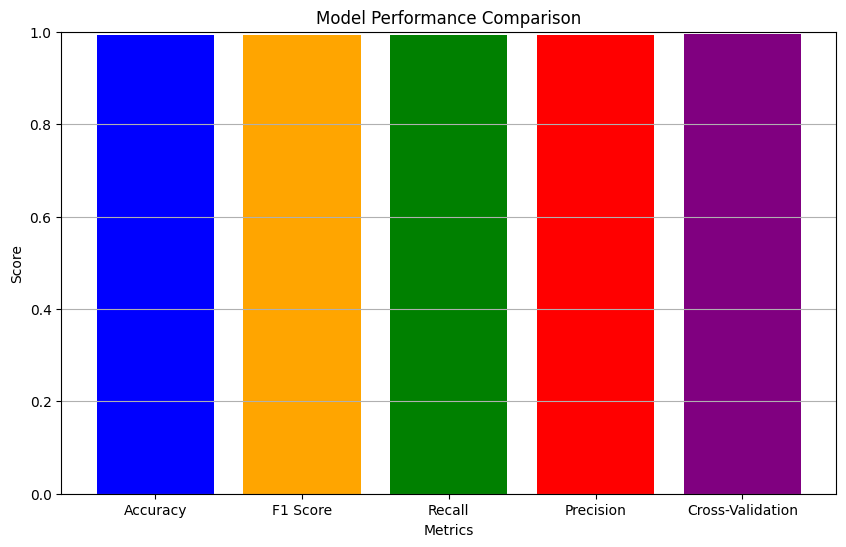

In [11]:
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision', 'Cross-Validation']
values = [accuracy, f1, recall, precision, mean_cv_score]
import matplotlib.pyplot as plt
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for better visualization
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Show the plot
plt.show()

In [12]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


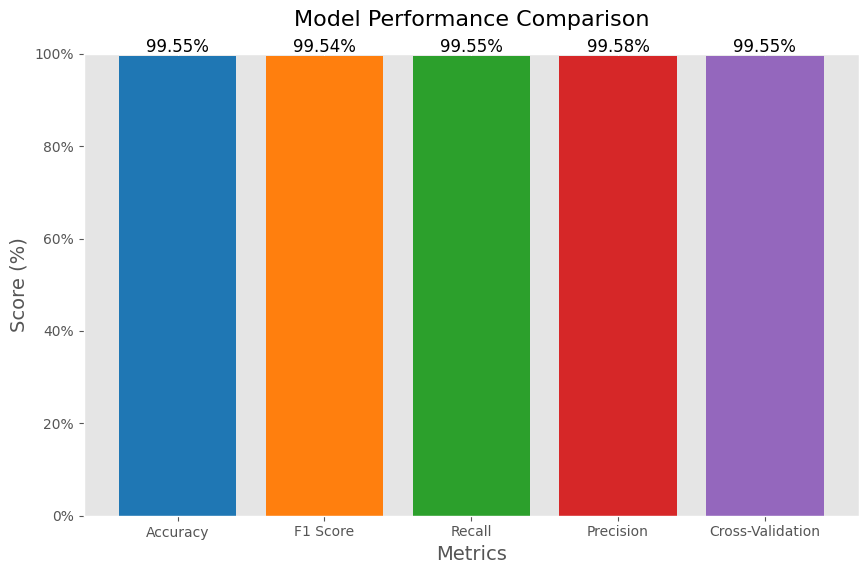

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import cross_val_score

# Assuming you have already defined your VotingClassifier as voting_clf
# and your training and test data as x_train, y_train_encoded, x_test, y_test_encoded

# Make predictions
y_pred = voting_clf.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred, average='weighted')  # Use 'macro' or 'micro' as needed
recall = recall_score(y_test_encoded, y_pred, average='weighted')
precision = precision_score(y_test_encoded, y_pred, average='weighted')

# Perform cross-validation
cv_scores = cross_val_score(voting_clf, x_train, y_train_encoded, cv=5)
mean_cv_score = cv_scores.mean()

# Prepare data for plotting
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision', 'Cross-Validation']
values = [accuracy, f1, recall, precision, mean_cv_score]

# Set the style
plt.style.use('ggplot')  # Change the style here

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] for better visualization

# Adjust the title position
plt.title('Model Performance Comparison', fontsize=16, pad=20)  # Increase pad to move title up
plt.ylabel('Score (%)', fontsize=14)
plt.xlabel('Metrics', fontsize=14)
plt.grid(axis='y')

# Format y-axis as percentage
def to_percent(y, position):
    return f'{y * 100:.0f}%'

formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval * 100:.2f}%", ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()